In [ ]:
# Importing the required Libraries

import pandas as pd

# Importing for visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Importing for preprocession

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Importing for model building

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing the libraris for the metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing the Libraries for Alogs

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the Libraires for Nueral Networks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Loading the Dataset

df = pd.read_csv('/content/drive/MyDrive/BIA/Datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Checking for null Values

df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# As we have to label encode the data thus making the object of the class
le = LabelEncoder()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [ ]:
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df['Sex'].value_counts()

,count
Sex,
1,725
0,193


In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
0,496
2,203
1,173
3,46


In [ ]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df['RestingECG'] = le.fit_transform(df['RestingECG'])

In [ ]:
df['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
0,547
1,371


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
1,460
2,395
0,63


In [ ]:
# Independent variable is the 'HeartDisease'
# Thus Checking the Data

df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
# As all the Data has been converted into numerical we will view it

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: xlabel='Age', ylabel='Count'>

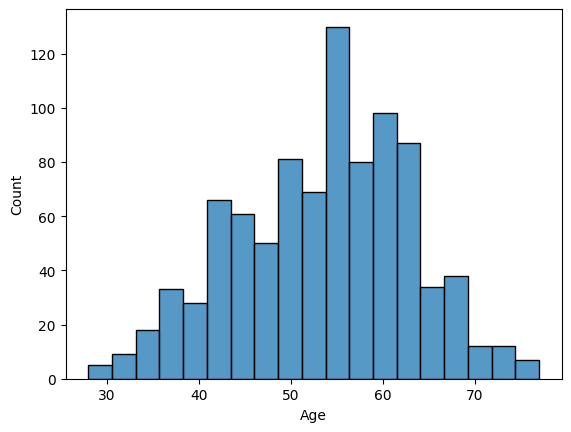

In [ ]:
sns.histplot(df['Age'])

<Axes: xlabel='RestingBP', ylabel='Count'>

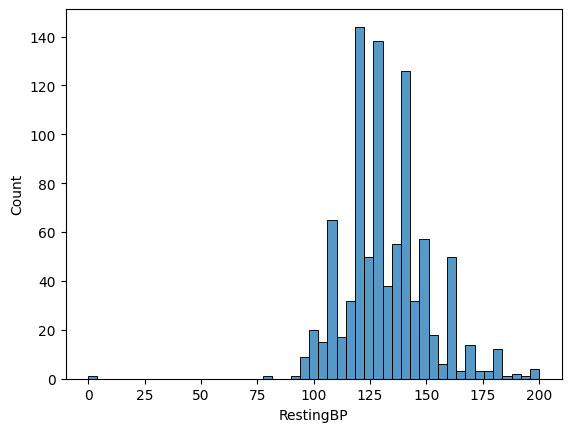

In [ ]:
sns.histplot(df['RestingBP'])

<Axes: xlabel='Cholesterol', ylabel='Count'>

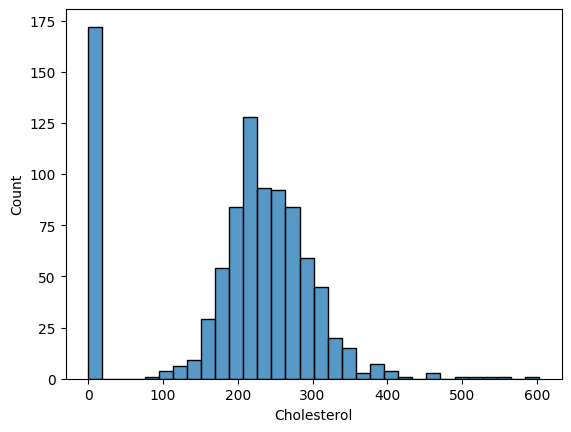

In [ ]:
sns.histplot(df['Cholesterol'])

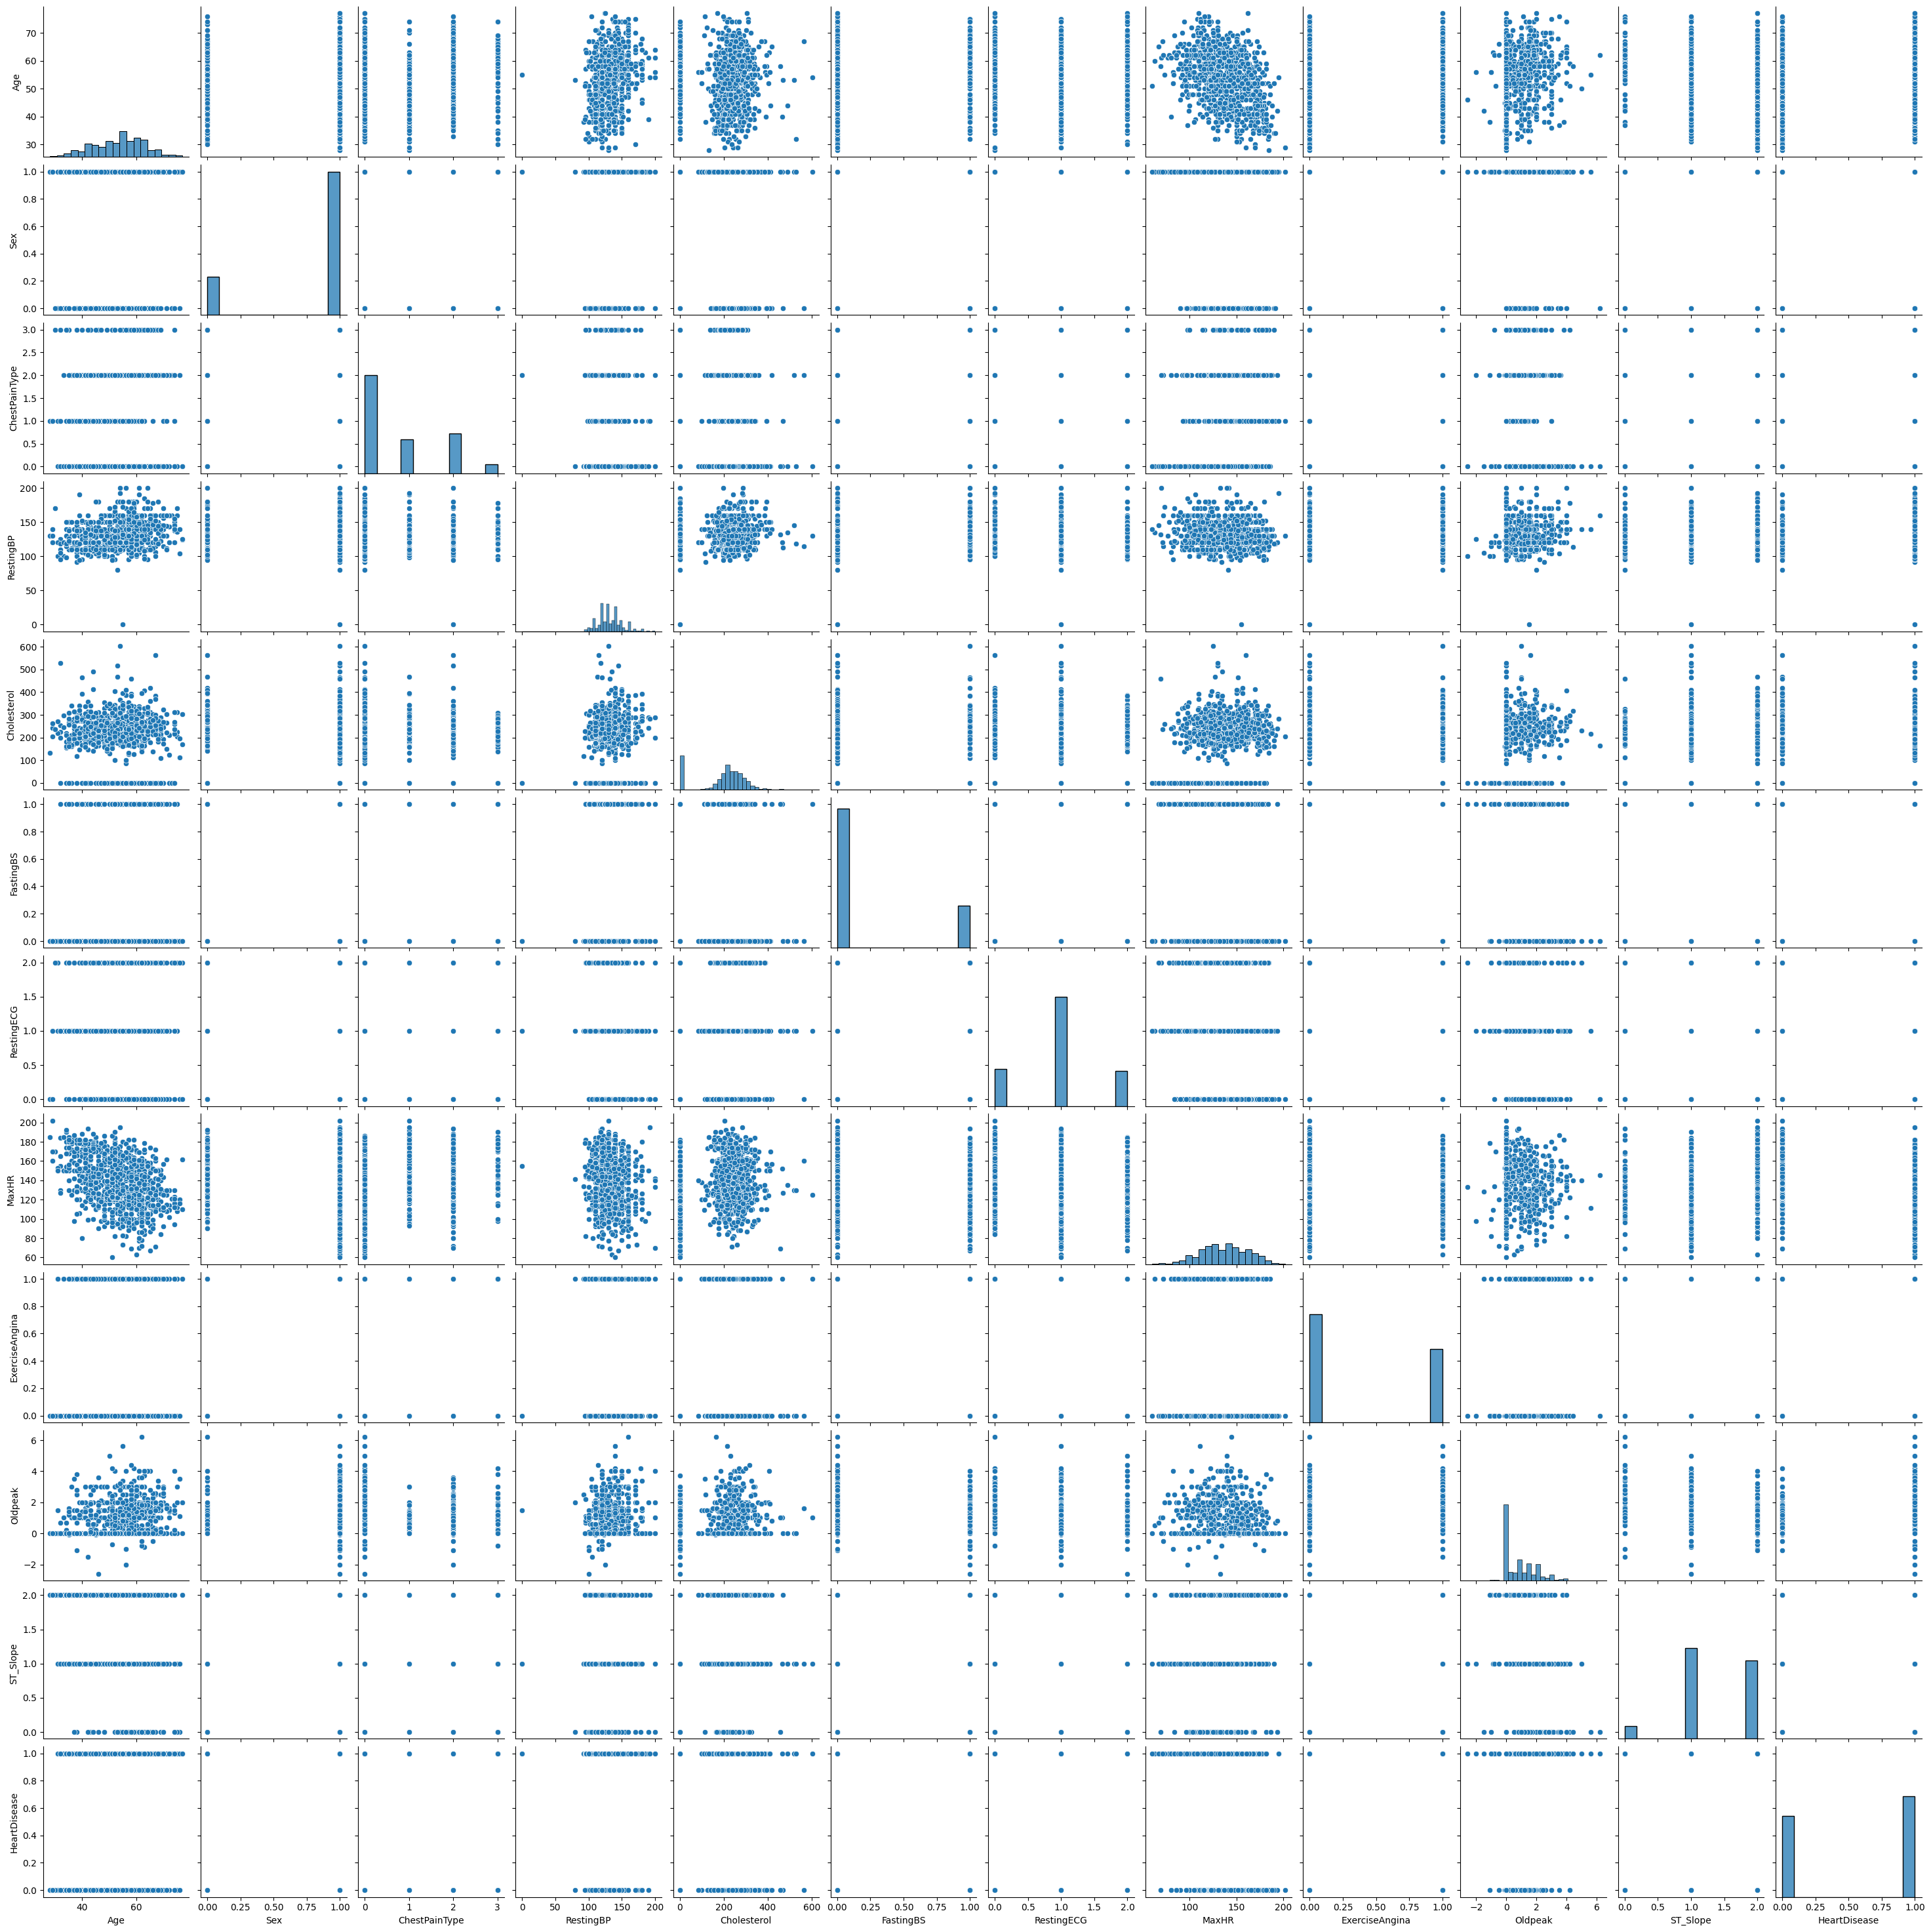

In [ ]:
sns.pairplot(df)

<Axes: ylabel='RestingBP'>

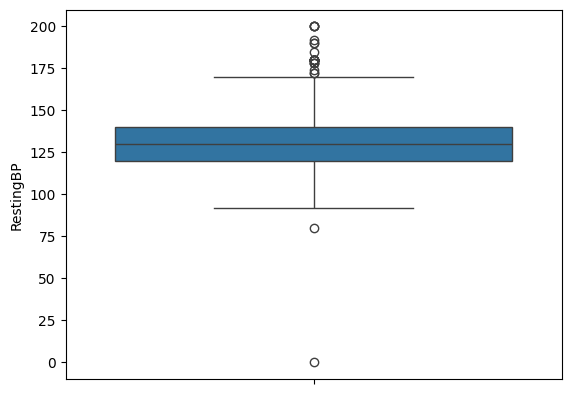

In [ ]:
sns.boxplot(df['RestingBP'])

Resting BP is the count ie when rest the Resting bp cannot be 0 so we will drop that particula data

In [ ]:
# Cheching which data we have to delete
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,1,155,0,1.5,1,1


In [ ]:
df.iloc[449, :]

,449
Age,55.0
Sex,1.0
ChestPainType,2.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,1.0
MaxHR,155.0
ExerciseAngina,0.0
Oldpeak,1.5


In [ ]:
df.drop(index = 449, axis = 0, inplace = True)

<Axes: xlabel='Sex', ylabel='count'>

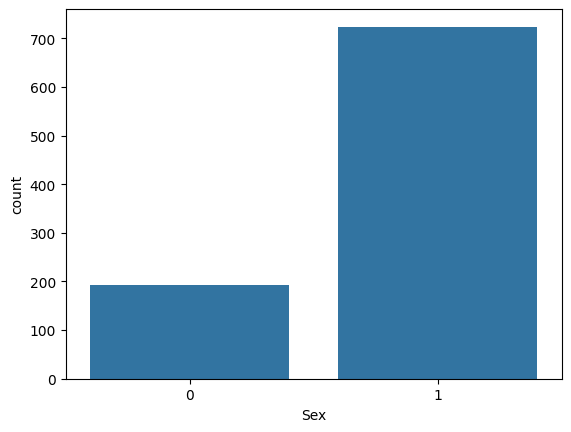

In [ ]:
sns.countplot(x = df['Sex'])

By the above data we can see the males got more heart disease that females

<Axes: xlabel='ChestPainType', ylabel='count'>

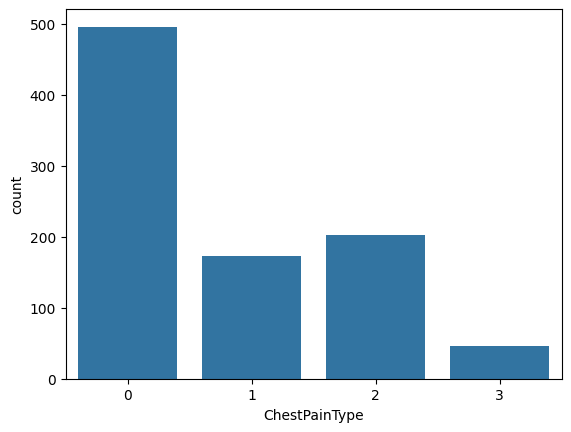

In [ ]:
sns.countplot(x = df['ChestPainType'])

In [ ]:
# Classifying into X and y ( Depending and Independent Variable)

X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [ ]:
# Splitting into Train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

# Model Selection

# --> As the data is small and has Binary classes we will implement Logistic regression

# --> As the data is small and linear we will implement SVM

# --> There are 7 categorical columns so we will be implementing Decision Tree


# Logistic Regression

In [ ]:
# Making the Object of the class LogisticRegression

lor = LogisticRegression()

In [ ]:
lor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lor.predict(X_test)

In [ ]:
logi_accuracy = accuracy_score(y_test, y_pred)
logi_accuracy

0.8858695652173914

In [ ]:
confusion_matrix(y_test, y_pred)

array([[69, 13],
       [ 8, 94]])

# KNN

In [ ]:
# Making te object

knn = KNeighborsClassifier()

In [ ]:
# Checking for the K value
# Viewing which K value Suits the best

scores = []
for k in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

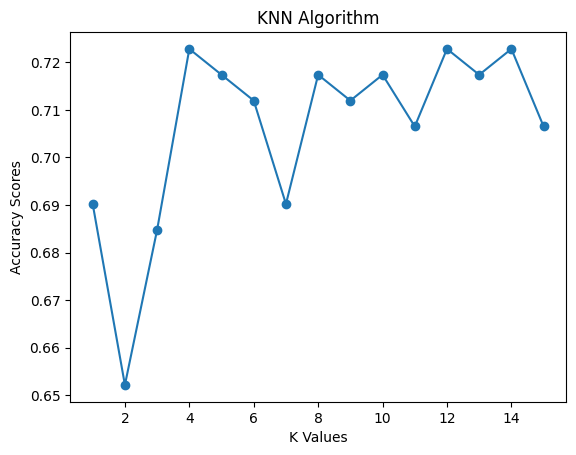

In [ ]:
plt.plot(range(1, 16), scores,  marker='o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.title('KNN Algorithm')
plt.show()

In [ ]:
# As seeing the data the K = 4 is the best value for the KNN model
# Thus traing the data with K = 4

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[65, 17],
       [34, 68]])

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7228260869565217

# SVM ( Normal )

In [ ]:
# Creating the object of the Class SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
# Predicting using X_test

y_pred = svc.predict(X_test)

In [ ]:
# Creating the confusion Matrix

confusion_matrix(y_test, y_pred)

array([[60, 22],
       [26, 76]])

In [ ]:
svc_accuracy = accuracy_score(y_test, y_pred)
svc_accuracy

0.7391304347826086

# SVM Classifier ( HyperParameter Tuning ) Using GridSearchCV

In [ ]:
# Making the Param Grid for the GridserachCV

param = {'kernel' : ['linear', 'poly', 'rbf']}

In [ ]:
# Making objects for SVC and gscv

svcgscv = SVC()
gscv = GridSearchCV(estimator = svcgscv,
                    param_grid = param,
                    scoring = 'accuracy')

In [ ]:
# Fitting the Model

gscv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
gscv.best_params_

{'kernel': 'linear'}

In [ ]:
svcgscv_accuracy = gscv.best_score_
svcgscv_accuracy

0.8404249370981269

# SVM Classifier ( HyperParameter Tuning ) Using RandomizedSearchCV

In [ ]:
# As we are using the SVM algo to train the model the parameters for Randomized SeacrhCV remains the same
# Thus we will make the object of class SVC and Randomized SeacrhCV class
# n_iter = 2 means we are telling the model to take only 2 random parameters while training

svcrscv = SVC()
rscv = RandomizedSearchCV(estimator = svcrscv,
                          param_distributions = param,
                          scoring = 'accuracy',
                          n_iter = 2)

In [ ]:
# Fitting the Model

rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=2,
                   param_distributions={'kernel': ['linear', 'poly', 'rbf']},
                   scoring='accuracy')

In [ ]:
rscv.best_params_

{'kernel': 'poly'}

In [ ]:
svcrscv_accuracy = rscv.best_score_
svcrscv_accuracy

0.7230267449445533

# Desicion Tree

In [ ]:
# Making the Object

dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[67, 15],
       [22, 80]])

In [ ]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_accuracy

0.7989130434782609

# Randon Forest

In [ ]:
# Making trh object od the class RandomForestClassifer
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[73,  9],
       [11, 91]])

In [ ]:
randomforest_accuracy = accuracy_score(y_test, y_pred)
randomforest_accuracy

0.8913043478260869

# ANN

In [ ]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
96,43,1,1,142,207,0,1,138,0,0.0,2
578,57,1,0,156,173,0,0,119,1,3.0,0
147,43,0,1,120,249,0,2,176,0,0.0,2
438,63,1,2,130,0,0,2,111,1,0.0,1
491,75,1,0,170,203,1,2,108,0,0.0,1


In [ ]:
X_train.shape

(733, 11)

In [ ]:
# Making the object of the Min Max Scalar and Sequential

mms = MinMaxScaler()
ann = Sequential()

In [ ]:
# Applying the MinMax Scalar to X

X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

In [ ]:
# Making the neural network

ann.add(Dense(11))  # Input Layer

ann.add(Dense(32, activation = 'relu'))  # HN 1
ann.add(Dense(8, activation = 'relu'))   # HN 2
ann.add(Dense(2, activation = 'relu'))   # HN 3

ann.add(Dense(1, activation = 'sigmoid')) # Output Layer



In [ ]:
# Setting the Compile metrics

ann.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy', 'precision']
            )

In [ ]:
ann.fit(X_train, y_train, epochs = 100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6157 - loss: 0.6783 - precision: 0.6125     
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.6004 - precision: 0.6559  
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8319 - loss: 0.5310 - precision: 0.8352 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.4732 - precision: 0.8258 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.4264 - precision: 0.8430
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3916 - precision: 0.8465
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.3998 - precision: 0.8457 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.4268 - precision: 0.8224 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3721 - precision: 0.8657 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
loss, accuracy, precision = ann.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8907 - loss: 0.3033 - precision: 0.8899 


# Accuracy Table Evaluation

In [ ]:
accuracy_data = pd.DataFrame(
    {'Algorithm' : ['Logistic Regression', 'KNN', 'SVM_Normal', 'SVM_GridSearchCV', 'SVM_RandomizedSearchCV', 'Decision Tree', 'Random Forest', "ANN"],
     'Accuracy' : [logi_accuracy, knn_accuracy, svc_accuracy, svcgscv_accuracy, svcrscv_accuracy, decision_tree_accuracy, randomforest_accuracy, precision]}
)

In [ ]:
accuracy_data

,Algorithm,Accuracy
0,Logistic Regression,0.885870
1,KNN,0.722826
2,SVM_Normal,0.739130
3,SVM_GridSearchCV,0.840425
4,SVM_RandomizedSearchCV,0.723027
5,Decision Tree,0.798913
6,Random Forest,0.891304
7,ANN,0.894231


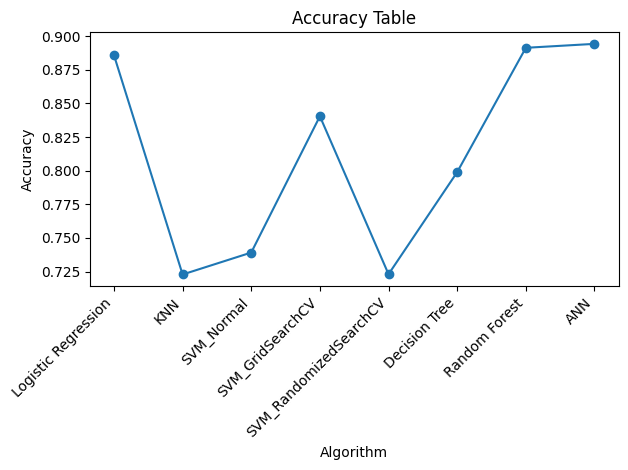

In [ ]:
plt.plot(accuracy_data['Algorithm'], accuracy_data['Accuracy'], marker='o')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Table')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()